<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001_DL_Lab_Implementation_of_a_new_CNN_Model_with_the_MNIST_dataset_Activity_2_Asgn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DL-Lab-CSE6037_Lab-Assignment-3_Activity-2_Implementation_of_a_new_CNN_Model_with_the_MNIST-dataset

Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link :


https://github.com/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001_DL_Lab_Implementation_of_a_new_CNN_Model_with_the_MNIST_dataset_Activity_2_Asgn_3.ipynb



In [152]:
#Importing library
import keras
#from keras.models import Reshape()
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [153]:
np.random.seed(1000)

Developing / Creating the CNN Model and adding the Convolution Layers

In [154]:
#Instantiation
Nmodel = Sequential()

1st Convolutional Layer : Input = 32x32x1. Output = 28x28x6               and

1st SubSampling Layer: Input = 28x28x6. Output = 14x14x6

In [155]:
#Nmodel.add(Reshape((32, 32, 1)))
#1st Convolutional Layer : Input = 32x32x1. Output = 28x28x6
Nmodel.add(Conv2D(32, (3,3),  padding='same', input_shape=(32,32,1), activation="relu"))
Nmodel.add(Conv2D(32, (3,3),  activation="relu"))

#1st SubSampling Layer: Input = 28x28x6. Output = 14x14x6
Nmodel.add(AveragePooling2D(pool_size=(2,2)))

Nmodel.add(BatchNormalization())
Nmodel.add(Dropout(0.25))


2nd Convolutional Layer : Input = 14x14x6. Output = 10x10x16

2nd SubSampling Layer: Input = 10x10x16. Output = 5x5x16

In [156]:
#2nd Convolutional Layer : Input = 14x14x6. Output = 10x10x16
Nmodel.add(Conv2D(64, (3,3),  padding='same', input_shape=(14,14,6), activation="relu"))
Nmodel.add(Conv2D(64, (3,3),  activation="relu"))

#2nd SubSampling Layer: Input = 10x10x16. Output = 5x5x16
Nmodel.add(AveragePooling2D(pool_size=(2,2)))

Nmodel.add(BatchNormalization())
Nmodel.add(Dropout(0.25))

In [157]:
#Passing the Model to a Fully Connected layer
Nmodel.add(Flatten())

1st Fully Connected Layer : Input = 5x5x16. Output = 120

In [158]:
#1st Fully Connected Layer : Input = 5x5x16. Output = 120
Nmodel.add(Dense(512, input_shape=(5,5,16), activation="relu"))

#Nmodel.add(BatchNormalization())
#Nmodel.add(Activation('relu'))

# Adding Dropout to prevent overfitting
Nmodel.add(Dropout(0.5))

2nd Fully Connected Layer : Input = 120. Output = 84

In [159]:
#2nd Fully Connected Layer : Input = 120. Output = 84
Nmodel.add(Dense(1, input_shape=(120,0,0), activation="sigmoid"))

#Nmodel.add(BatchNormalization())
#Nmodel.add(Activation('relu'))

# Adding Dropout to prevent overfitting
#Nmodel.add(Dropout(0.4))

 Output Layer : 10

In [160]:
#Output Layer: 10
Nmodel.add(Dense(10))
Nmodel.add(BatchNormalization())
Nmodel.add(Activation('softmax'))

In [161]:
#Model Summary
Nmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)       

To Compile the CNN Model :

In [162]:
# Compiling the model
Nmodel.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [163]:
#save the trained model to a file so that it can be used to make predictions later :
Nmodel.save("N_model.h5")

To Load the MNIST  dataset from Keras :

In [164]:
#Keras library for MNIST dataset
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)=mnist.load_data()

To Train-validate-test split the MNIST dataset on the Model :

In [165]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=10)

To Display Sample Input Images :

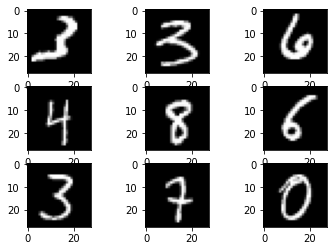

In [166]:
from matplotlib import pyplot
subplots = []
rows = 3
cols = 3
for i in range(9):
	# define subplot
	pyplot.subplot(rows, cols, i+1)
	# plot raw pixel data
	pyplot.imshow(x_train[i],cmap="gray")
# show the figure
pyplot.show()

To Display Sample Output Images :

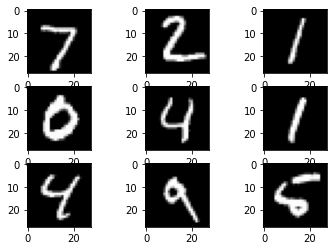

In [167]:
from matplotlib import pyplot
subplots = []
rows1 = 3
cols1 = 3
for i1 in range(9):
	# define subplot
	pyplot.subplot(rows1, cols1, i1+1)
	# plot raw pixel data
	pyplot.imshow(x_test[i1],cmap="gray")
# show the figure
pyplot.show()

To Display the total images in the MNIST dataset :

In [168]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000,)
(10000,)
(18000,)


To Display the size of the Images in the MNIST dataset :

In [169]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((42000, 28, 28), (42000,))
((10000, 28, 28), (10000,))
((18000, 28, 28), (18000,))


To Display the no of classes in the MNIST dataset :

In [170]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print(" ")
print('Output classes : ', classes)

Total number of outputs :  10
 
Output classes :  [0 1 2 3 4 5 6 7 8 9]


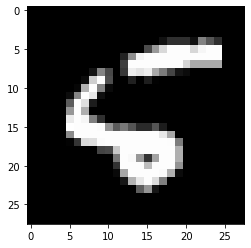

Label :  5


In [171]:
import matplotlib.pyplot as plt
plt.imshow(x_test[8],cmap='gray')
plt.show()

print("Label : ", y_test[8])

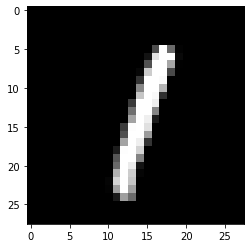

Label :  1


In [172]:
import matplotlib.pyplot as plt
plt.imshow(x_test[5],cmap='gray')
plt.show()

print("Label : ", y_test[5])

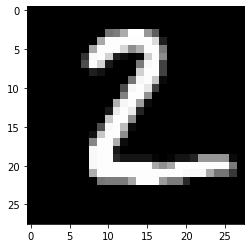

Label :  2


In [173]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1],cmap='gray')
plt.show()

print("Label : ", y_test[1])

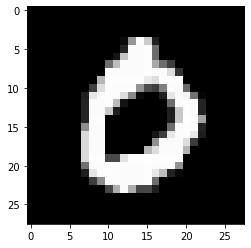

Label :  0


In [174]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3],cmap='gray')
plt.show()

print("Label : ", y_test[3])

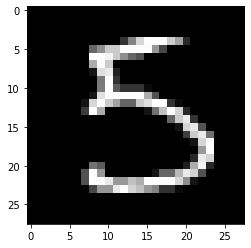

Label :  5


In [175]:
import matplotlib.pyplot as plt
plt.imshow(x_test[15],cmap='gray')
plt.show()

print("Label : ", y_test[15])